## Fast lap analysis

First create an InfluxDB client by importing the modules and setting all the required configuration.

In [178]:
### Imports and configurations

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

# configure influxdb client
ORG = "b4mad"
TOKEN = os.environ.get(
    "INFLUXDB_TOKEN",
    "citqAMr66LLb25hvaaZm2LezOc88k2ocOFJcJDR6QB-RmLJa_-sAr9kYB4vSFYaz8bt26lm7SokVgpQKdgKFKA==",
)
URL = "https://telemetry.b4mad.racing/"

# and create the client and a quary api
client = influxdb_client.InfluxDBClient(url=URL, token=TOKEN, org=ORG)
query_api = client.query_api()

gameName = "iRacing"
trackCode = "sebring international"
carModel = "Ferrari 488 GT3 Evo 2020"

### Find all sessions for our track and car.

In [3]:
query = f"""
    from(bucket: "racing")
        |> range(start:-10y, stop: now())
        |> filter(fn: (r) => r._field == "CurrentLapTime" and r["GameName"] == "{gameName}" )
        |> filter(fn: (r) => r["CarModel"] == "{carModel}" )
        |> filter(fn: (r) => r["TrackCode"] == "{trackCode}" )
        |> last()
        |> limit(n: 1)
        |> keep(columns: ["_time", "_value", "CarModel","TrackCode", "SessionId", "SessionTypeName"])
        |> group()
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_time,_value,CarModel,SessionId,SessionTypeName,TrackCode
0,_result,0,2022-11-22 18:56:23.426000+00:00,101.137070,Ferrari 488 GT3 Evo 2020,1669141800,Practice,sebring international
1,_result,0,2022-11-22 19:00:01.518000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143592,Race,sebring international
2,_result,0,2022-11-22 19:00:03.579000+00:00,2.023300,Ferrari 488 GT3 Evo 2020,1669143601,Race,sebring international
3,_result,0,2022-11-22 19:01:02.437000+00:00,60.839966,Ferrari 488 GT3 Evo 2020,1669143603,Race,sebring international
4,_result,0,2022-11-22 19:01:43.521000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143678,Race,sebring international
5,_result,0,2022-11-22 19:01:45.643000+00:00,2.156700,Ferrari 488 GT3 Evo 2020,1669143703,Race,sebring international
6,_result,0,2022-11-22 19:06:25.404000+00:00,21.816000,Ferrari 488 GT3 Evo 2020,1669143705,Race,sebring international
7,_result,0,2022-11-22 19:06:51.497000+00:00,0.000000,Ferrari 488 GT3 Evo 2020,1669143986,Race,sebring international
8,_result,0,2022-11-22 19:06:54.695000+00:00,3.223333,Ferrari 488 GT3 Evo 2020,1669144011,Race,sebring international
9,_result,0,2022-11-22 19:10:17.410000+00:00,70.870100,Ferrari 488 GT3 Evo 2020,1669144014,Race,sebring international


### Now we can query the data for a specific session.

In [4]:
# get the last row in the dataframe
SESSION = df.iloc[-1]["SessionId"]

query = f"""
from(bucket: "racing")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{SESSION}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

df = query_api.query_data_frame(org=ORG, query=query)
df

,result,table,_start,_stop,_time,CarModel,GameName,SessionId,SessionTypeName,TrackCode,...,Clutch,CurrentLap,CurrentLapTime,DistanceRoundTrack,Gear,Handbrake,Rpms,SpeedMs,SteeringAngle,Throttle
0,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:01:32.414000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5566.95300,2.0,0.0,0.0,31.750063,-0.086433,1.000000
1,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:01:32.445000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5568.01500,2.0,0.0,0.0,31.940120,-0.086433,1.000000
2,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:01:32.476000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5569.08300,2.0,0.0,0.0,32.126000,-0.086433,1.000000
3,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:01:32.507000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5570.15700,2.0,0.0,0.0,32.315220,-0.086433,1.000000
4,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:01:32.538000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,1.0,0.000000,5571.23800,2.0,0.0,0.0,32.509575,-0.086433,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33171,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:18:42.631000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.107933,5435.22266,3.0,0.0,0.0,38.392506,-1.283112,0.951155
33172,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:18:42.662000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.141266,5436.46100,3.0,0.0,0.0,38.480133,-1.272218,0.997950
33173,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:18:42.693000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.174600,5437.70264,3.0,0.0,0.0,38.579773,-1.257936,1.000000
33174,_result,0,2012-11-30 21:37:24.743539+00:00,2022-12-01 09:37:24.743539+00:00,2022-11-25 21:18:42.724000+00:00,Ferrari 488 GT3 Evo 2020,iRacing,1669410092,Race,sebring international,...,1.0,8.0,120.207932,5438.94775,3.0,0.0,0.0,38.670950,-1.242442,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31701 entries, 0 to 31700
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype                  
---  ------              --------------  -----                  
 0   result              31701 non-null  object                 
 1   table               31701 non-null  int64                  
 2   _start              31701 non-null  datetime64[ns, tzutc()]
 3   _stop               31701 non-null  datetime64[ns, tzutc()]
 4   _time               31701 non-null  datetime64[ns, tzutc()]
 5   CarModel            31701 non-null  object                 
 6   GameName            31701 non-null  object                 
 7   SessionId           31701 non-null  object                 
 8   SessionTypeName     31701 non-null  object                 
 9   TrackCode           31701 non-null  object                 
 10  _measurement        31701 non-null  object                 
 11  host                31701 non-null  objec

### Now we can plot the data, starting with just the brake inputs and the time on the x axis.

<AxesSubplot:xlabel='datetime'>

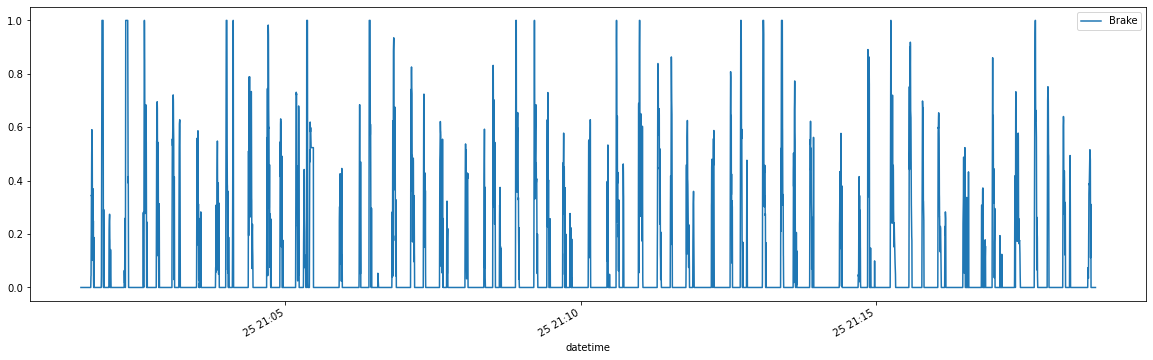

In [5]:
brake = df.copy()
brake = brake[["Brake", "_time"]]
brake["datetime"] = pd.to_datetime(brake["_time"])
brake.drop(columns=["_time"], inplace=True)
brake.set_index("datetime", inplace=True)
brake.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (20, 6)
brake.plot()

### Now plot every other value column, the x-axis is the just the index of the DataFrame.

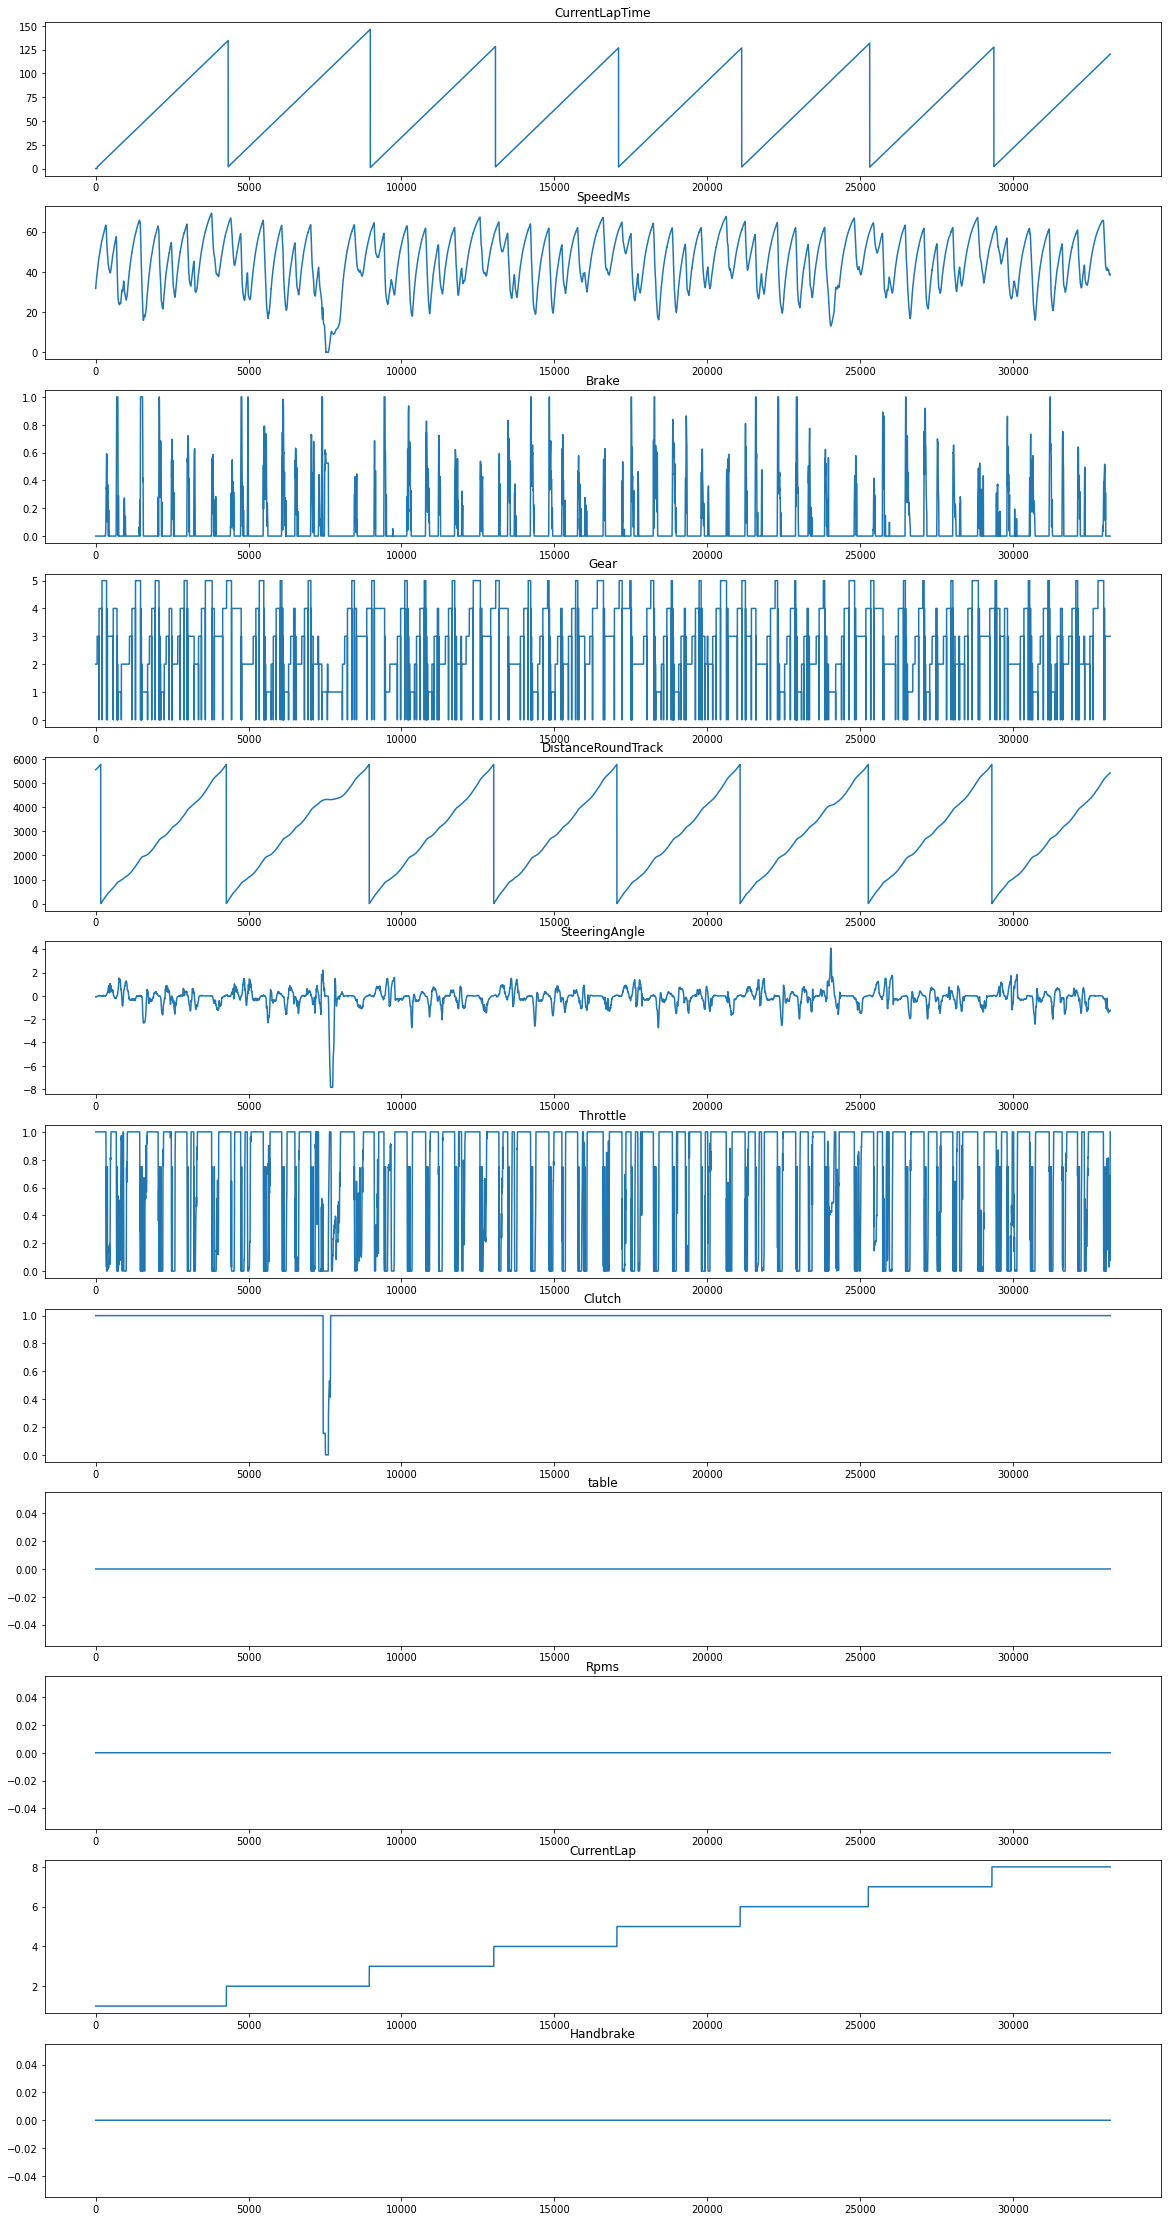

In [6]:
plt.rcParams["figure.figsize"] = (20, 40)
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
newdf = df.select_dtypes(include=numerics)
cols = set(newdf.columns)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    newdf[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

### And just a single lap.

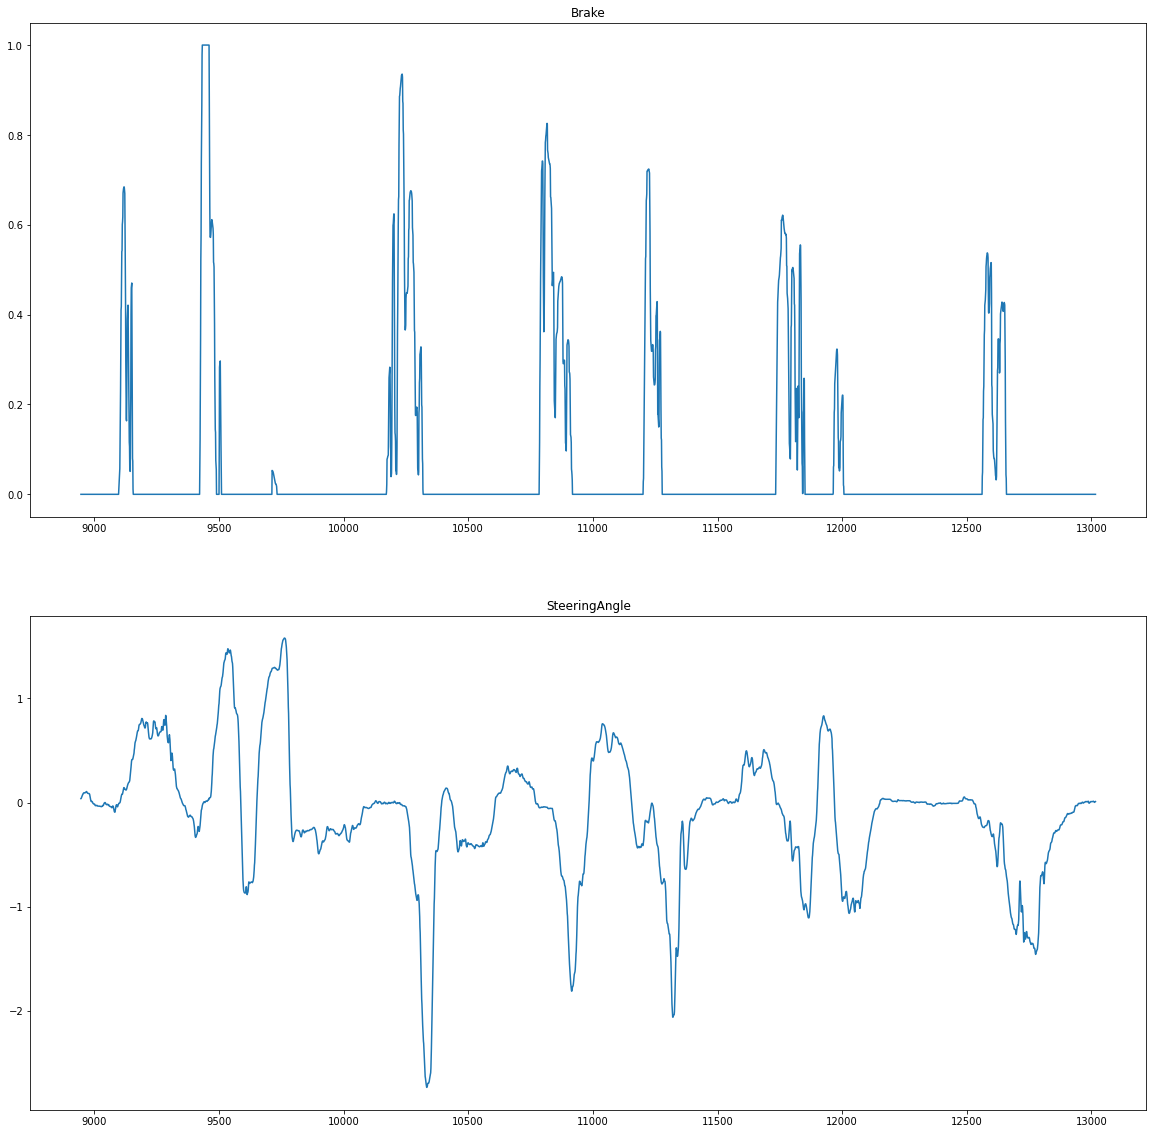

In [7]:
lap = 3
plt.rcParams["figure.figsize"] = (20, 20)
cols = ["Brake", "SteeringAngle"]
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df.loc[df["CurrentLap"] == lap, c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()

### Now we plot all brake values for all laps against the distance.

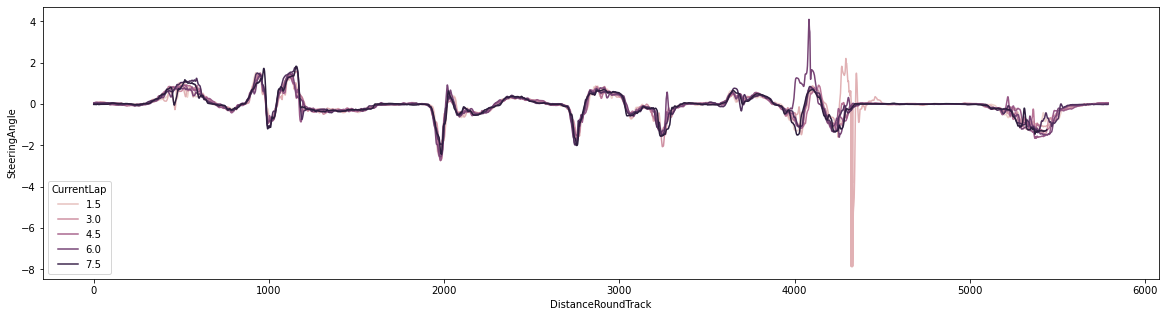

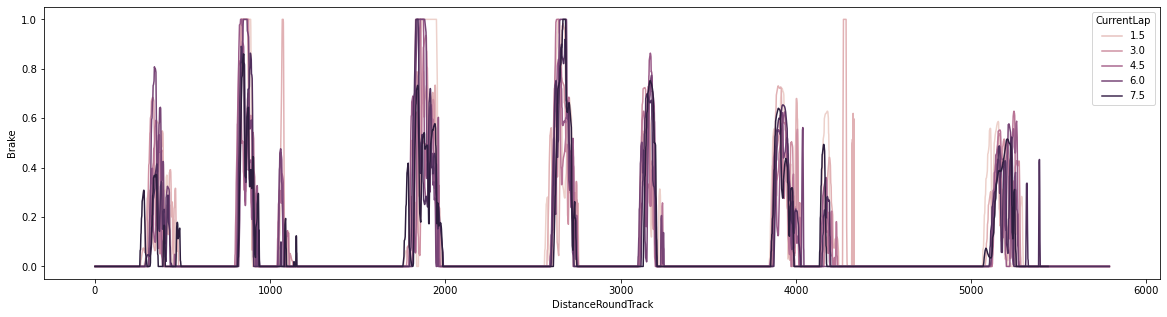

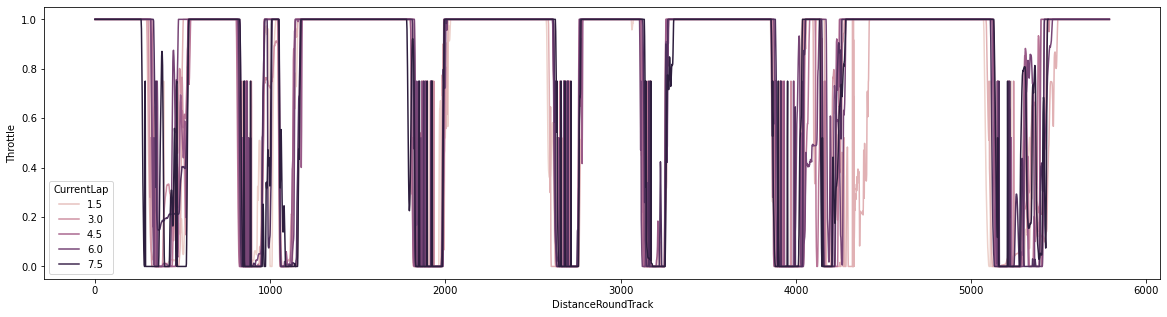

In [8]:
plt.rcParams["figure.figsize"] = (20, 5)
for c in ["SteeringAngle", "Brake", "Throttle"]:
    sns.lineplot(data=df, x="DistanceRoundTrack", y=c, hue="CurrentLap", legend=True)
    plt.show()

# Find n fastest laps

Iterate over all sessions and find the n fastest laps. A lap is considered complete, if the `DistanceRoundTrack` is reached. The time for a lap is the last value of the `CurrentLapTime` column.

In [9]:
# First, get all session dataframes
query = f"""
    from(bucket: "racing")
        |> range(start:-10y, stop: now())
        |> filter(fn: (r) => r._field == "CurrentLapTime" and r["GameName"] == "{gameName}" )
        |> filter(fn: (r) => r["CarModel"] == "{carModel}" )
        |> filter(fn: (r) => r["TrackCode"] == "{trackCode}" )
        |> last()
        |> limit(n: 1)
        |> keep(columns: ["_time", "_value", "CarModel","TrackCode", "SessionId", "SessionTypeName"])
        |> group()
"""

df_all_sessions = query_api.query_data_frame(org=ORG, query=query)

### Create a function to find the duration of each lap

In [10]:
# Define the length of the track, i.e. the minimal and maximal values
# that DistanceRoundTrack should contain
# This should be adapted for different tracks
minDist = 0
maxDist = 5780
dist_jump = 50 # This is to reject laps where DistanceRoundTrack presents discontinuities 

# Create a function to get the lap duration of each full lap of a given session
def get_lap_durations(df):
    ###
    # This function finds the lap duration of each lap for a given session dataframe
    # Input: 
    # - df is a dataframe of a given session
    # Outputs:
    # - laps is a list containing full laps
    # - lapDurations is a list containing the lap duration of each full lap
    ###

    # Loop over laps to reject not complete laps
    fullLaps = []
    lapDurations = []
    laps = np.unique(df['CurrentLap'])
    for l in laps:
        dist = df['DistanceRoundTrack'][df['CurrentLap']==l].values
        argmin = dist.argmin()
        argmax = dist.argmax()+1
        if argmin > argmax: continue
        # Check non empty array
        if dist[argmin:argmax].size < 2: continue
        # Check that the DistanceRoundTrack goes from minimum to maximum distance value
        if dist[argmin:argmax].min() > minDist + 10: continue
        if dist[argmin:argmax].max() < maxDist - 10: continue
        # Check that there is no discontinuity in the DistanceRoundTrack
        dist_diff = dist[argmin:argmax][1:]-dist[argmin:argmax][:-1]
        if dist_diff.max() > dist_jump: continue
        # Append to list the lap number and duration of that lap
        fullLaps.append(l)
        lapDurations.append(df['CurrentLapTime'][df['CurrentLap']==l].iloc[argmin:argmax].iloc[-1])

    return fullLaps, lapDurations

### Extract lap duration for each full lap

In [11]:
# Loop over all sessions, and extract lap duration for each full lap
session_list = []
full_lap_list = []
lap_duration_list = []

# Loop over all sessions :
for i,session in enumerate(df_all_sessions['SessionId']):
    # Get the data frame of that session
    print(f"{i} - Getting data for SessionId: {session}")
    query = f"""
    from(bucket: "racing")
      |> range(start: -10y, stop: now())
      |> filter(fn: (r) => r["_measurement"] == "laps_cc")
    //  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
      |> filter(fn: (r) => r["SessionId"] == "{session}")
      |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
      |> sort(columns: ["_time"], desc: false)
    """
    try:
        df = query_api.query_data_frame(org=ORG, query=query)
    except:
        print(f"Could not get data for SessionId: {session}")
        continue
    # get the lap duration for each full lap
    laps, lapDurations = get_lap_durations(df)
    # Add the session ids, lap numbers and lap durations to corresponding lists
    session_list.extend([session for i in range(len(laps))])
    full_lap_list.extend(laps)
    lap_duration_list.extend(lapDurations)

0 - Getting data for SessionId: 1669141800
1 - Getting data for SessionId: 1669143592
2 - Getting data for SessionId: 1669143601
3 - Getting data for SessionId: 1669143603
4 - Getting data for SessionId: 1669143678
5 - Getting data for SessionId: 1669143703
6 - Getting data for SessionId: 1669143705
7 - Getting data for SessionId: 1669143986
8 - Getting data for SessionId: 1669144011
9 - Getting data for SessionId: 1669144014
10 - Getting data for SessionId: 1669144218
11 - Getting data for SessionId: 1669144245
12 - Getting data for SessionId: 1669144248
13 - Getting data for SessionId: 1669144289
14 - Getting data for SessionId: 1669144316
15 - Getting data for SessionId: 1669144317
16 - Getting data for SessionId: 1669144565
17 - Getting data for SessionId: 1669144591
18 - Getting data for SessionId: 1669144593
19 - Getting data for SessionId: 1669144835
20 - Getting data for SessionId: 1669144861
21 - Getting data for SessionId: 1669144863
22 - Getting data for SessionId: 166914514

In [12]:
# Print all SessionId ; CurrentLap; total lap duration
for i in range(len(session_list)):
    print(f"SessionId: {session_list[i]} ; CurrentLap: {full_lap_list[i]} ; LapDuration: {lap_duration_list[i]}")

SessionId: 1669141800 ; CurrentLap: 2.0 ; LapDuration: 125.9081
SessionId: 1669141800 ; CurrentLap: 4.0 ; LapDuration: 126.744469
SessionId: 1669141800 ; CurrentLap: 5.0 ; LapDuration: 124.15847
SessionId: 1669141800 ; CurrentLap: 6.0 ; LapDuration: 129.088669
SessionId: 1669141800 ; CurrentLap: 7.0 ; LapDuration: 137.064362
SessionId: 1669143705 ; CurrentLap: 2.0 ; LapDuration: 125.1491
SessionId: 1669144317 ; CurrentLap: 1.0 ; LapDuration: 137.94
SessionId: 1669144863 ; CurrentLap: 1.0 ; LapDuration: 135.906662
SessionId: 1669145383 ; CurrentLap: 2.0 ; LapDuration: 124.585732
SessionId: 1669145383 ; CurrentLap: 3.0 ; LapDuration: 126.81073
SessionId: 1669145383 ; CurrentLap: 4.0 ; LapDuration: 125.55043
SessionId: 1669227579 ; CurrentLap: 3.0 ; LapDuration: 125.9764
SessionId: 1669229318 ; CurrentLap: 2.0 ; LapDuration: 131.344971
SessionId: 1669230142 ; CurrentLap: 2.0 ; LapDuration: 123.5412
SessionId: 1669230142 ; CurrentLap: 3.0 ; LapDuration: 126.33503
SessionId: 1669230142 ; Cu

In [13]:
# Sort the lap durations list
msk = np.argsort(lap_duration_list)
session_list = np.array(session_list)[msk]
full_lap_list = np.array(full_lap_list)[msk]
lap_duration_list = np.array(lap_duration_list)[msk]

# Print the n fastest laps
n = 10
for i in range(n):
    print(f"SessionId: {session_list[i]} ; CurrentLap: {full_lap_list[i]} ; LapDuration: {lap_duration_list[i]}")

SessionId: 1669233672 ; CurrentLap: 3.0 ; LapDuration: 121.627136
SessionId: 1669232937 ; CurrentLap: 2.0 ; LapDuration: 122.2452
SessionId: 1669233672 ; CurrentLap: 6.0 ; LapDuration: 122.250832
SessionId: 1669233672 ; CurrentLap: 5.0 ; LapDuration: 122.679665
SessionId: 1669230142 ; CurrentLap: 2.0 ; LapDuration: 123.5412
SessionId: 1669233672 ; CurrentLap: 2.0 ; LapDuration: 123.57917
SessionId: 1669233672 ; CurrentLap: 7.0 ; LapDuration: 123.697563
SessionId: 1669230142 ; CurrentLap: 4.0 ; LapDuration: 124.090431
SessionId: 1669141800 ; CurrentLap: 5.0 ; LapDuration: 124.15847
SessionId: 1669233672 ; CurrentLap: 4.0 ; LapDuration: 124.389336


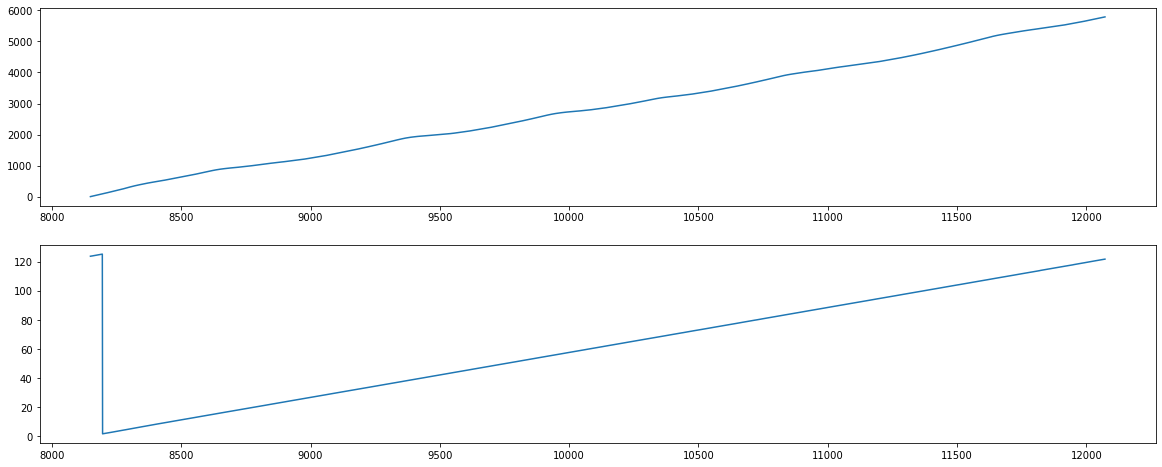

In [14]:
# A cell to check the DistanceRoundTrack and CurrentLapTime with a plot
# for a given (SessionId, CurrentLap) couple
session=1669233672
lap=3

# Get the data frame of that session
query = f"""
from(bucket: "racing")
  |> range(start: -10y, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps_cc")
//  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "{session}")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
"""

try:
    df = query_api.query_data_frame(org=ORG, query=query)
except:
    print(f"Could not get data for SessionId: {session}")
    continue

# Plot DistanceRoundTrack and CurrentLapTime
fig, ax = plt.subplots(2, figsize=(20,8))
ax[0].plot(df['DistanceRoundTrack'][df['CurrentLap']==lap])
ax[1].plot(df['CurrentLapTime'][df['CurrentLap']==lap])

# Splice a track into segments

Using the combined / averaged values of the `SteeringAngle` data, we want to splice the track `DistanceRoundTrack` into segments. 
* A segement is defined by the start and end of a major turn.
* Each segment connects directly to the next segment.
* The start of a segment is the middle betwee two turns (i.e not just at the beginning of a turn).

See below for the example of the `sebring international` track.


### Compute average Brake, Throttle, SteeringAngle, Gear, DistanceRoundTrack, SpeedMs and CurrentLapTime over the n fastest laps

In [18]:
# Select only the n fastest laps
n = 10
session_list = session_list[:n]
full_lap_list = full_lap_list[:n]
lap_duration_list = lap_duration_list[:n]

In [93]:
# Construct a dictionary that will store the data
data = ['Brake', 'Throttle', 'SteeringAngle', 'Gear', 'DistanceRoundTrack', 'SpeedMs', 'CurrentLapTime']
data_lists = {}
for d in data:
    data_lists[d] = []

# Loop over the SessionIds for the n fastest laps
for i,session in enumerate(np.unique(session_list)):
    print(f"{i} - Getting data for SessionId: {session}")
    query = f"""
    from(bucket: "racing")
      |> range(start: -10y, stop: now())
      |> filter(fn: (r) => r["_measurement"] == "laps_cc")
    //  |> filter(fn: (r) => r["_field"] == "DistanceRoundTrack" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
      |> filter(fn: (r) => r["SessionId"] == "{session}")
      |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
      |> sort(columns: ["_time"], desc: false)
    """
    # Open the data frame corresponding to session
    try:
        df = query_api.query_data_frame(org=ORG, query=query)
    except:
        print(f"Could not get data for SessionId: {session}")
        continue
    # Find the corresponding fastest laps in that session and loop over them
    laps = full_lap_list[session_list==session]
    for l in laps:
        # Get the data of each fastest lap
        for d in data:
            data_lists[d].append(df[d][df['CurrentLap']==l].values)

0 - Getting data for SessionId: 1669141800
1 - Getting data for SessionId: 1669230142
2 - Getting data for SessionId: 1669232937
3 - Getting data for SessionId: 1669233672


In [94]:
# Define the maximal size of all SteeringAngle arrays
maxSize = max([s.size for s in data_lists['SteeringAngle']])

# Define a dictionnary that will store the data
# we need a dictionnary that contains arrays with all the same size,
# rather than the previous dictionnary that was containing lists
data_arrays = {}
for d in data:
    data_arrays[d] = np.zeros((n,maxSize))

# Better to have ones for Throttle instead of zeros
data_arrays['Throttle'] = np.ones((n,maxSize))   

# Fill the dictionnary with data
for i in range(n):
    for d in data:
        data_arrays[d][i][:data_lists[d][i].size] = data_lists[d][i]

In [95]:
# Do the average of all data in the dictionnary
# over the n fastest laps
# and store it in a new dictionnary
av_data_arrays = {}
for d in data:
    av_data_arrays[d] = np.mean(data_arrays[d], axis=0)

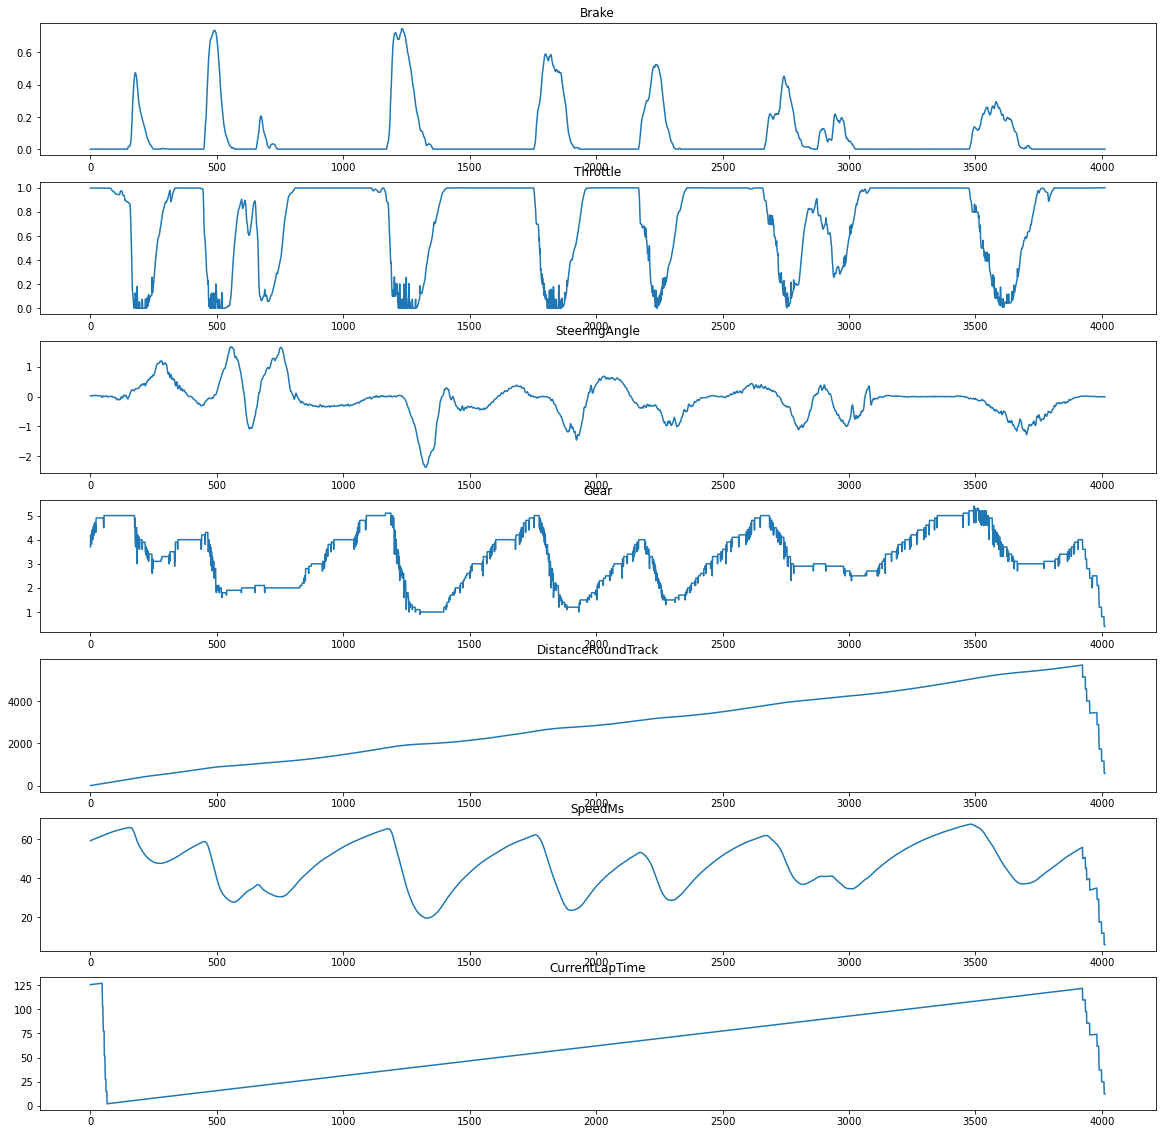

In [96]:
# Plot the averaged data
fig, ax = plt.subplots(len(data), figsize=(20,20))
for i,d in enumerate(data):
    ax[i].plot(av_data_arrays[d])
    ax[i].set_title(d)

### Slice each laps into segments

In [97]:
# for readibility, define a variable that store the average SteeringAngle array
steer = av_data_arrays['SteeringAngle']

# Define threshold to select major turns, which means abs(SteeringAngle) > threshold
# This should be modified for different tracks
threshold = 0.8

In [98]:
# Find extrama in SteeringAngle
# Mask 1 gives the indices where SteerinAngle is above thresold : each major turn
msk1 = np.where(np.abs(steer) > threshold)

# Mask 2 gives the indices of the end of a major turn
# which means when the indices giving the major turns are separeted by 10 or more
idx = np.arange(steer.size)[msk1]
idx_diff = idx[1:] - idx[:-1]
msk2 = np.concatenate(([0], np.where(idx_diff>10)[0]))

# Define the list that will store the extrama indices
extrema_idx = []

# Mask 3 gives the indices of the center of each major turn
for i, m in enumerate(msk2[:-1]):
    # select SteeringAngle for the i turn
    steer_tmp = steer[idx[msk2][i]:idx[msk2][i+1]]
    # find index of the extrema of SteeringAngle
    extrema_idx_tmp = np.argmax(np.abs(steer_tmp))
    # add idx offset to find the index in the full SteeringAngle array
    extrema_idx_truth = extrema_idx_tmp + idx[msk2][i]
    # add to list
    extrema_idx.append(extrema_idx_truth)

extrema_idx = np.array(extrema_idx)

In [99]:
# Find the begining and end of each segment : center between two major turns
center_idx = ((extrema_idx[1:]+extrema_idx[:-1])/2).astype('int32')
center_idx = np.concatenate(([0], center_idx,[steer.size-1]))

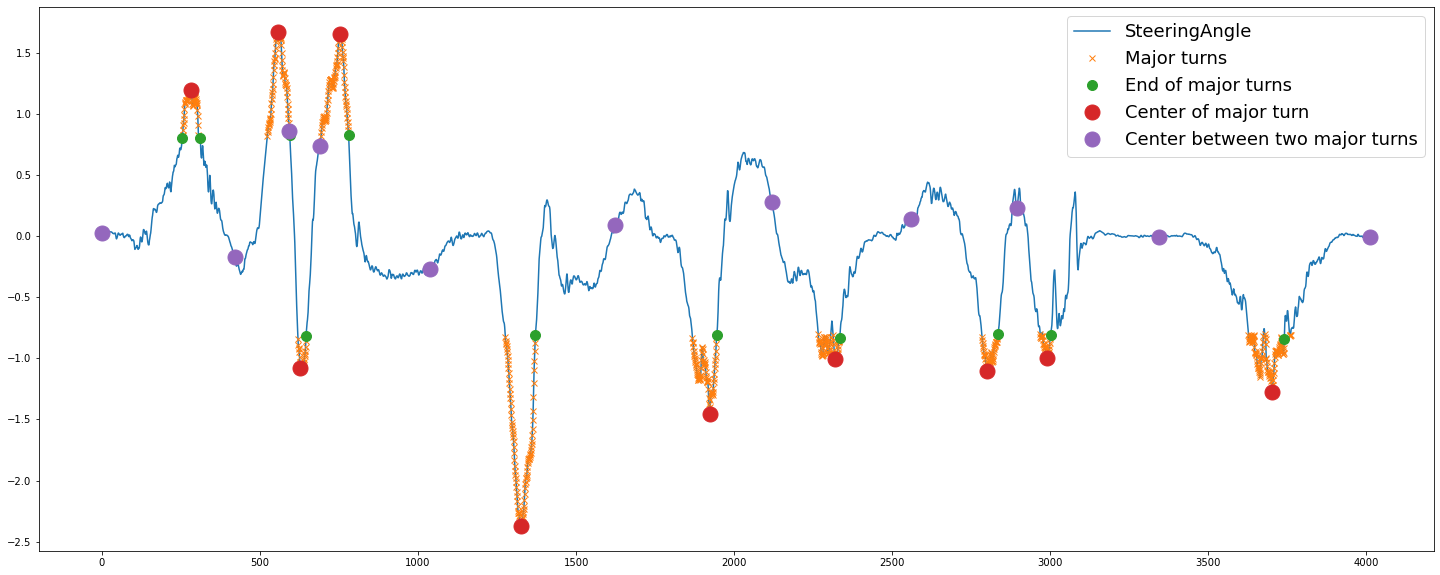

In [100]:
# Plot the Averaged SteeringAngle, and show the identification of major turns
plt.rcParams["figure.figsize"] = (25, 10)
plt.plot(steer, label='SteeringAngle')
plt.plot(idx, steer[msk1], 'x', label='Major turns')
plt.plot(idx[msk2], steer[msk1][msk2], 'o', label='End of major turns', markersize='10')
plt.plot(np.arange(steer.size)[extrema_idx], steer[extrema_idx], 'o', 
         label='Center of major turn', markersize='15')
plt.plot(np.arange(steer.size)[center_idx], steer[center_idx], 'o', 
         label='Center between two major turns', markersize='15')
plt.legend(fontsize=18)
plt.show()

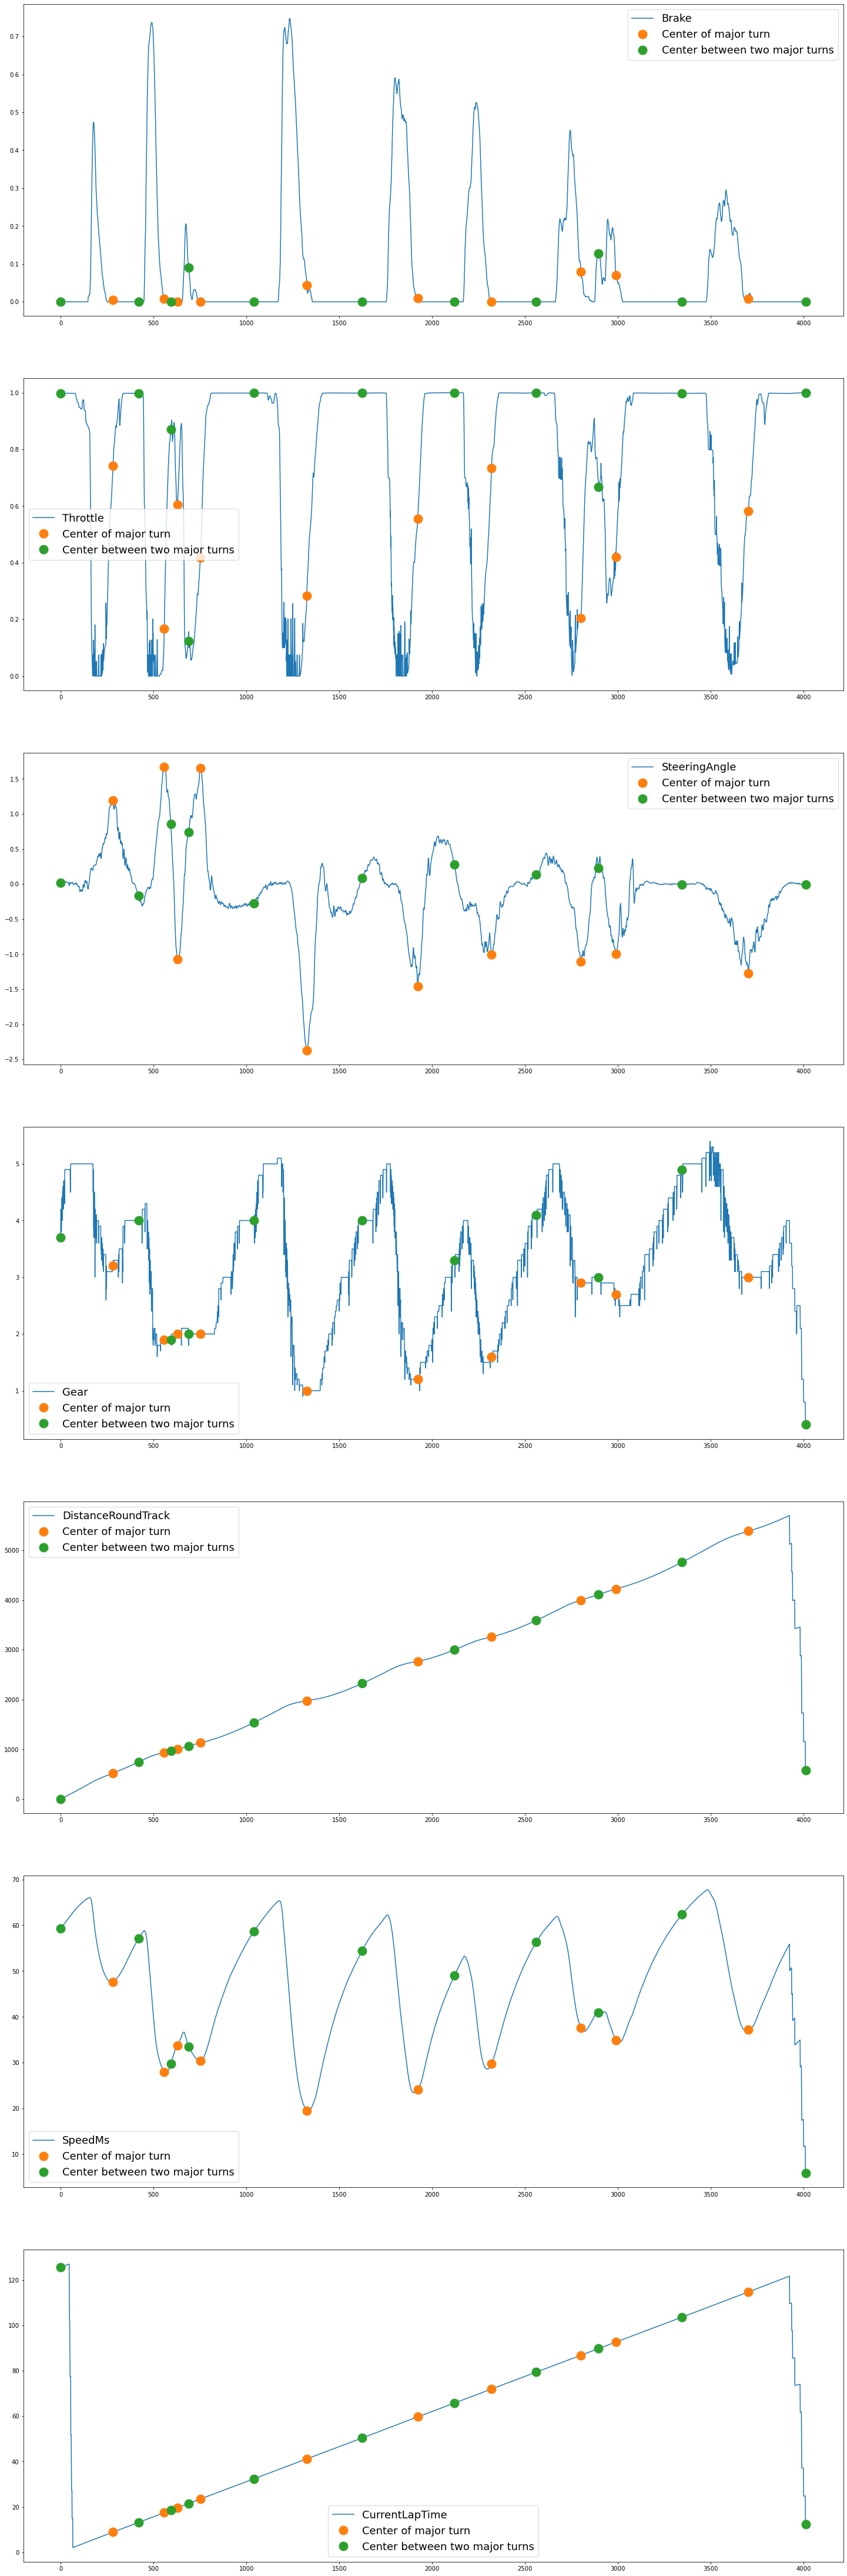

In [153]:
# Plot all data entry and show the center and start/end of each major turn
fig, ax = plt.subplots(len(data), figsize=(25,80))
for i,d in enumerate(data):
    ax[i].plot(av_data_arrays[d], label=d)
    # ax[i].plot(idx, av_data_arrays[d][msk1], 'x', label='Major turns')
    # ax[i].plot(idx[msk2], av_data_arrays[d][msk1][msk2], 'o', 
    #          label='End of major turns', markersize='10')
    ax[i].plot(np.arange(av_data_arrays[d].size)[extrema_idx], av_data_arrays[d][extrema_idx],
             'o', label='Center of major turn', markersize='15')
    ax[i].plot(np.arange(av_data_arrays[d].size)[center_idx], av_data_arrays[d][center_idx],
             'o', label='Center between two major turns', markersize='15')
    ax[i].legend(fontsize=18)
plt.show()

In [104]:
# Build the segment dictionnary that contains a list for each data entry
# these lists gather the data for each turn
segment_number = center_idx.size - 1

# initialize dictionnary
segment_data = {}
for d in data:
    segment_data[d] = []

# fill the dictionnary
for i in range(segment_number):
    for d in data:
        segment_data[d].append(av_data_arrays[d][center_idx[i]:center_idx[i+1]])

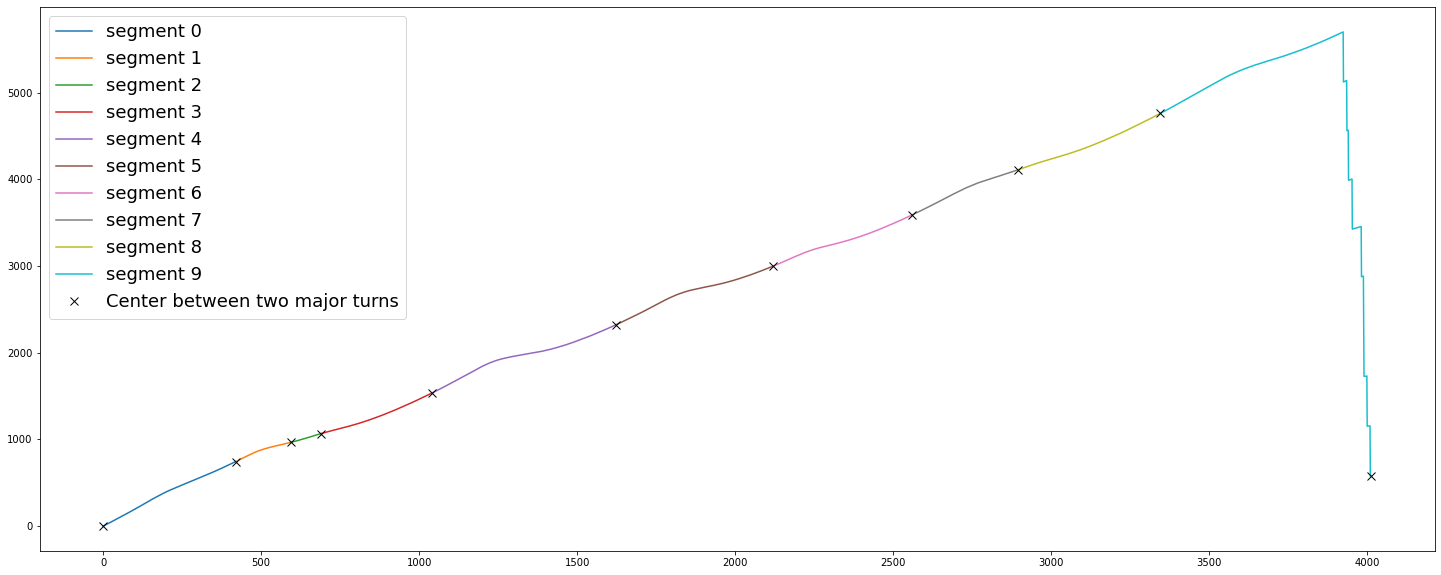

In [105]:
# Plot the segments
plt.rcParams["figure.figsize"] = (25, 10)
for i in range(segment_number):
    plt.plot(np.arange(steer.size)[center_idx[i]:center_idx[i+1]], segment_data['DistanceRoundTrack'][i],
            label=f'segment {i}')
plt.plot(np.arange(steer.size)[center_idx], 
         av_data_arrays['DistanceRoundTrack'][center_idx], 'x', 
         label='Center between two major turns', markersize='8', color='black')
plt.legend(fontsize=18)
plt.show()

# Extract track data from fastest laps

From all fastest laps we want to extract the average value for the track guide data.


* start / end: the start and end of the turn (see above)
* brake: the average DistanceRoundTrack when the brake is pressed the first time
* turn_in: the average DistanceRoundTrack when the steering wheel is turned into the corner (maybe use rate of change)
* force: the average value of the maximum brake force during the turn 
* gear: the average value of the lowest gear during the turn
* speed: the lowest value during the turn
* stop: the average value when the brake force is starting to decrease
* accelerate: the average DistanceRoundTrack when the throttle is pressed again during the turn


In [122]:
# Start and end of each turns
start_dist = []
start_time = []
end_dist = []
end_time = []
for i in range(segment_number):
    start_dist.append(segment_data['DistanceRoundTrack'][i][0])
    start_time.append(segment_data['CurrentLapTime'][i][0])
    end_dist.append(segment_data['DistanceRoundTrack'][i][-1])
    end_time.append(segment_data['CurrentLapTime'][i][-1])

In [138]:
# Average DistanceRoundTrack when brake is pressed the first time
first_brake_dist = []
for i in range(segment_number):
    j = np.where(segment_data['Brake'][i] > 0)[0][0]
    first_brake_dist.append(segment_data['DistanceRoundTrack'][i][j])

In [142]:
# Average DistanceRoundTrack when brake is released completly
release_brake_dist = []
for i in range(segment_number):
    j = np.where(segment_data['Brake'][i] > 0)[0][-1]
    release_brake_dist.append(segment_data['DistanceRoundTrack'][i][j])

In [157]:
# Average brake force during the turn
brake_force = []
for i in range(segment_number):
    brake_force.append(segment_data['Brake'][i].max())

In [162]:
# Average value of gear at the middle of the turn
lowest_gear = []
for i in range(segment_number):
    lowest_gear.append(av_data_arrays['Gear'][extrema_idx][i])

In [165]:
# Average lowest value of speed during the turn
lowest_speed = []
for i in range(segment_number):
    lowest_speed.append(av_data_arrays['SpeedMs'][extrema_idx][i])

In [175]:
# Average value of distance when the brake force is at maximum
decrease_brake_dist = []
for i in range(segment_number):
    j = np.argmax(segment_data['Brake'][i])
    decrease_brake_dist.append(segment_data['DistanceRoundTrack'][i][j])

In [176]:
# Average DistanceRoundTrack when the throttle is pressed again during the turn
lowest_throttle_dist = []
for i in range(segment_number):
    j = np.where(segment_data['Throttle'][i] == segment_data['Throttle'][i].min())[0][-1]
    lowest_throttle_dist.append(segment_data['DistanceRoundTrack'][i][j])

In [177]:
# Do a big print that shows every values for each segment
for i in range(segment_number):
    s = f"Segment number: {i}  ;  "
    s += f"start dist: {start_dist[i]:8.1f}  ;  end dist: {end_dist[i]:8.1f}  ;  "
    s += f"start time: {start_time[i]:8.1f}  ;  end time: {end_time[i]:8.1f}  ;  "
    s += f"first brake: {first_brake_dist[i]:8.1f}  ;  "
    s += f"brake release: {release_brake_dist[i]:8.1f}  ;  "
    s += f"brake force: {brake_force[i]:8.4f}  ;  "
    s += f"lowest gear: {lowest_gear[i]:5.2f}  ;  "
    s += f"lowest speed: {lowest_speed[i]:6.2f}  ;  "
    s += f"brake decrease: {decrease_brake_dist[i]:8.1f}  ;  "
    s += f"lowest throttle: {lowest_throttle_dist[i]:8.1f}  ;  "
    print(s)

Segment number: 0  ;  start dist:      1.1  ;  end dist:    744.3  ;  start time:    125.6  ;  end time:     13.2  ;  first brake:    291.1  ;  brake release:    560.8  ;  brake force:   0.4742  ;  lowest gear:  3.20  ;  lowest speed:  47.63  ;  brake decrease:    356.9  ;  lowest throttle:    346.9  ;  
Segment number: 1  ;  start dist:    746.1  ;  end dist:    965.2  ;  start time:     13.2  ;  end time:     18.5  ;  first brake:    798.3  ;  brake release:    946.8  ;  brake force:   0.7372  ;  lowest gear:  1.90  ;  lowest speed:  27.91  ;  brake decrease:    866.7  ;  lowest throttle:    913.2  ;  
Segment number: 2  ;  start dist:    966.2  ;  end dist:   1067.4  ;  start time:     18.6  ;  end time:     21.6  ;  first brake:   1028.8  ;  brake release:   1067.4  ;  brake force:   0.2059  ;  lowest gear:  2.00  ;  lowest speed:  33.79  ;  brake decrease:   1051.6  ;  lowest throttle:   1053.8  ;  
Segment number: 3  ;  start dist:   1068.5  ;  end dist:   1532.1  ;  start time: 